## Finding the best place to open a restaurant - Bronx

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
bronx = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
CLIENT_ID = 'IZQOW0KRVWJVQLKLEUGHHAMIU2TVJH0S0A3S1SVDAISBV3OS' # your Foursquare ID
CLIENT_SECRET = 'Z2NPM51THSEZKFKT2CNDQ3QBMLBBCECG2QUVOU1SL4JDVYMT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IZQOW0KRVWJVQLKLEUGHHAMIU2TVJH0S0A3S1SVDAISBV3OS
CLIENT_SECRET:Z2NPM51THSEZKFKT2CNDQ3QBMLBBCECG2QUVOU1SL4JDVYMT


In [11]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
bronx_venues = getNearbyVenues(names=bronx['Neighborhood'],
                                   latitudes=bronx['Latitude'],
                                   longitudes=bronx['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [13]:
bronx_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,Gas Station


In [14]:
bronx_venues.groupby('Venue Category').count().sort_values(['Venue'],ascending=False).head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Pizza Place,101,101,101,101,101,101
Deli / Bodega,56,56,56,56,56,56
Donut Shop,44,44,44,44,44,44
Pharmacy,42,42,42,42,42,42
Italian Restaurant,41,41,41,41,41,41


In [15]:
print('There are {} uniques categories.'.format(len(bronx_venues['Venue Category'].unique())))

There are 171 uniques categories.


In [16]:
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Boat or Ferry,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Venue,Nail Salon,Nightclub,Office,Outdoors & Recreation,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Rental Car Location,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Social Club,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wings Joint,Women's Store
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [21]:
restaurants_bronx = bronx_onehot[["Neighborhood","African Restaurant","American Restaurant", 
                                  "Arepa Restaurant","Asian Restaurant", "Caribbean Restaurant","Chinese Restaurant", 
                                  "Fast Food Restaurant", "French Restaurant", "Greek Restaurant", 
                                  "Indian Restaurant", "Mexican Restaurant", "Pizza Place", "Sushi Restaurant"]]
restaurants_bronx.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Mexican Restaurant,Pizza Place,Sushi Restaurant
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
restaurants_bronx_groupped_byNeighbhd = restaurants_bronx.groupby('Neighborhood').sum()
restaurants_bronx_groupped_byNeighbhd.head()


,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Mexican Restaurant,Pizza Place,Sushi Restaurant
Neighborhood,,,,,,,,,,,,,
Allerton,0,0,0,0,0,2,1,0,0,0,0,4,0
Baychester,0,0,0,0,0,0,1,0,0,0,1,1,0
Bedford Park,0,0,0,0,0,3,0,0,0,0,4,3,0
Belmont,0,1,0,0,0,0,1,0,0,0,2,9,0
Bronxdale,0,0,0,0,0,1,0,0,0,0,1,1,0


In [25]:
restaurants_bronx_groupped_byNeighbhd.shape

(52, 13)

<AxesSubplot:xlabel='Neighborhood'>

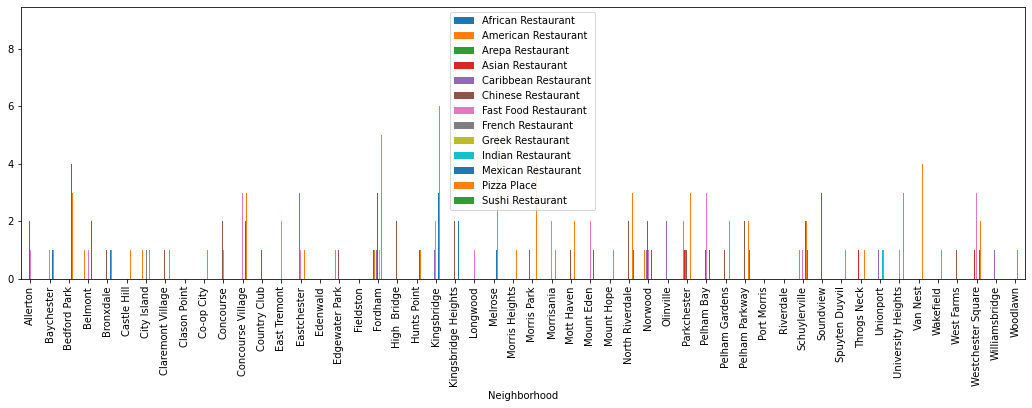

In [30]:
restaurants_bronx_groupped_byNeighbhd.plot(kind='bar', figsize=(18, 5) )

In [33]:
bronx_grouped_mean = restaurants_bronx.groupby('Neighborhood').mean().reset_index()
bronx_grouped_mean.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Mexican Restaurant,Pizza Place,Sushi Restaurant
0,Allerton,0.0,0.000000,0.0,0.0,0.0,0.066667,0.033333,0.0,0.0,0.0,0.000000,0.133333,0.0
1,Baychester,0.0,0.000000,0.0,0.0,0.0,0.000000,0.047619,0.0,0.0,0.0,0.047619,0.047619,0.0
2,Bedford Park,0.0,0.000000,0.0,0.0,0.0,0.090909,0.000000,0.0,0.0,0.0,0.121212,0.090909,0.0
3,Belmont,0.0,0.010417,0.0,0.0,0.0,0.000000,0.010417,0.0,0.0,0.0,0.020833,0.093750,0.0
4,Bronxdale,0.0,0.000000,0.0,0.0,0.0,0.076923,0.000000,0.0,0.0,0.0,0.076923,0.076923,0.0


In [36]:
num_top_venues = 3

for hood in bronx_grouped_mean['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped_mean[bronx_grouped_mean['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                  venue  freq
0           Pizza Place  0.13
1    Chinese Restaurant  0.07
2  Fast Food Restaurant  0.03


----Baychester----
                  venue  freq
0  Fast Food Restaurant  0.05
1    Mexican Restaurant  0.05
2           Pizza Place  0.05


----Bedford Park----
                venue  freq
0  Mexican Restaurant  0.12
1  Chinese Restaurant  0.09
2         Pizza Place  0.09


----Belmont----
                 venue  freq
0          Pizza Place  0.09
1   Mexican Restaurant  0.02
2  American Restaurant  0.01


----Bronxdale----
                venue  freq
0  Chinese Restaurant  0.08
1  Mexican Restaurant  0.08
2         Pizza Place  0.08


----Castle Hill----
                 venue  freq
0          Pizza Place   0.2
1   African Restaurant   0.0
2  American Restaurant   0.0


----City Island----
                 venue  freq
0  American Restaurant  0.04
1    French Restaurant  0.04
2          Pizza Place  0.04


----Claremont Village----
                 

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped_mean['Neighborhood']

for ind in np.arange(bronx_grouped_mean.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped_mean.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Allerton,Pizza Place,Chinese Restaurant,Fast Food Restaurant
1,Baychester,Pizza Place,Mexican Restaurant,Fast Food Restaurant
2,Bedford Park,Mexican Restaurant,Pizza Place,Chinese Restaurant
3,Belmont,Pizza Place,Mexican Restaurant,Fast Food Restaurant
4,Bronxdale,Pizza Place,Mexican Restaurant,Chinese Restaurant


In [40]:
# set number of clusters
kclusters = 4

bronx_grouped_clustering = bronx_grouped_mean.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 3, 1, 3, 1, 0, 3, 0, 0], dtype=int32)

In [41]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bronx_merged = bronx

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bronx_merged = bronx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head() # check the last columns!


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,1,Pizza Place,Sushi Restaurant,Mexican Restaurant
1,Bronx,Co-op City,40.874294,-73.829939,0,Pizza Place,Fast Food Restaurant,Sushi Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,2,Caribbean Restaurant,Pizza Place,Fast Food Restaurant
3,Bronx,Fieldston,40.895437,-73.905643,0,Sushi Restaurant,Pizza Place,Mexican Restaurant
4,Bronx,Riverdale,40.890834,-73.912585,0,Sushi Restaurant,Pizza Place,Mexican Restaurant


In [42]:
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.8466508, -73.8785937.


In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [44]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 0, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
1,Co-op City,Pizza Place,Fast Food Restaurant,Sushi Restaurant
3,Fieldston,Sushi Restaurant,Pizza Place,Mexican Restaurant
4,Riverdale,Sushi Restaurant,Pizza Place,Mexican Restaurant
9,Baychester,Pizza Place,Mexican Restaurant,Fast Food Restaurant
11,City Island,Pizza Place,French Restaurant,American Restaurant
15,Fordham,Pizza Place,Fast Food Restaurant,Chinese Restaurant
17,West Farms,Pizza Place,Chinese Restaurant,Sushi Restaurant
21,Port Morris,Sushi Restaurant,Pizza Place,Mexican Restaurant
22,Longwood,Fast Food Restaurant,Sushi Restaurant,Pizza Place
24,Morrisania,Fast Food Restaurant,Pizza Place,Chinese Restaurant


In [45]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 1, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Wakefield,Pizza Place,Sushi Restaurant,Mexican Restaurant
5,Kingsbridge,Pizza Place,Mexican Restaurant,Fast Food Restaurant
6,Woodlawn,Pizza Place,Indian Restaurant,Sushi Restaurant
13,University Heights,Pizza Place,Fast Food Restaurant,African Restaurant
14,Morris Heights,Pizza Place,Sushi Restaurant,Mexican Restaurant
16,East Tremont,Pizza Place,Fast Food Restaurant,Sushi Restaurant
19,Melrose,Pizza Place,Mexican Restaurant,Sushi Restaurant
23,Hunts Point,Pizza Place,Mexican Restaurant,Sushi Restaurant
27,Throgs Neck,Pizza Place,Asian Restaurant,American Restaurant
31,Van Nest,Pizza Place,Sushi Restaurant,Mexican Restaurant


In [46]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 2, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
2,Eastchester,Caribbean Restaurant,Pizza Place,Fast Food Restaurant
8,Williamsbridge,Caribbean Restaurant,Sushi Restaurant,Pizza Place
40,Olinville,Caribbean Restaurant,Sushi Restaurant,Pizza Place


In [47]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
7,Norwood,Pizza Place,Chinese Restaurant,Mexican Restaurant
10,Pelham Parkway,Pizza Place,Chinese Restaurant,Sushi Restaurant
12,Bedford Park,Mexican Restaurant,Pizza Place,Chinese Restaurant
18,High Bridge,Pizza Place,Chinese Restaurant,Asian Restaurant
20,Mott Haven,Pizza Place,Chinese Restaurant,Sushi Restaurant
25,Soundview,Chinese Restaurant,Pizza Place,Sushi Restaurant
28,Country Club,Chinese Restaurant,Sushi Restaurant,Pizza Place
29,Parkchester,Pizza Place,American Restaurant,Mexican Restaurant
35,North Riverdale,Pizza Place,Chinese Restaurant,Sushi Restaurant
38,Edgewater Park,Pizza Place,Chinese Restaurant,Asian Restaurant
